In [2]:
# !pip install datasets
# !pip install transformers
# !pip install -U accelerate
# !pip install optuna
# !pip install shap
# !pip install lime
# !pip install transformers-interpret
# !pip install omnixai
# !pip install ipython>=8.10.0
# !pip install captum
# !pip install git+https://github.com/yidinghao/interpreting-nlp
# !pip install yattag

# !pip install pyarabic

#Data

In [13]:
import pickle

with open('train_final.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('test_final.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('val_final.pkl', 'rb') as f:
    X_dev = pickle.load(f)

In [14]:
label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}

classes = ['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear']

In [15]:
X_train.head()

,tweet,label,tweet_with_out_emojis,cleaned_data,Root Stemming,Light Stemming
5081,1996 يا مهند ياحبيبي انت تدور لبش مع اي احد ...,1,1996 يا مهند ياحبيبي انت تدور لبش مع اي احد ...,مهند ياحبيبي تدور لبش متاكد ابو جاسم مايدري,هند حبب تدر لبش تكد ابو جسم ايدر,مهند ياحبيبي تدور لبش متاكد ابو جاسم مايدري
8264,حلب عفرين اعتقال عشرات الشباب من قريه باسوطه ...,3,حلب عفرين اعتقال عشرات الشباب من قريه باسوطه ...,حلب عفرين اعتقال عشرات الشباب قريه باسوطه ريف ...,حلب عفر عقل عشر شبب قره بسط ريف عفر قوت هرب عش...,حلب عفر اعتقال عشر الشباب قريه باسوطه ريف عفر ...
9777,انا نفسي مره اجرب اكون ليك حد اقرب : ),3,انا نفسي مره اجرب اكون ليك حد اقرب : ),مره اجرب اكون ليك اقرب,مره جرب اكن ليك قرب,مره اجرب اكون ليك اقرب
740,الصراحه احساس مخزي ونحن نكتفي بالتمثيل المشرف ...,3,الصراحه احساس مخزي ونحن نكتفي بالتمثيل المشرف ...,الصراحه احساس مخزي نكتفي بالتمثيل المشرف الاول...,صرح حسس خزي كتف شرف اوليمبياد عوز صحه ريض,الصراحه احساس مخزي نكتفي بالتمثيل المشرف الاول...
6537,57 عاجل الايطالي فابيو باسل يفوز بدهب الاولي...,0,57 عاجل الايطالي فابيو باسل يفوز بدهب الاولي...,عاجل الايطالي فابيو باسل يفوز بدهب الاوليمبياد...,عجل يطل ابو بسل يفز دهب اوليمبياد جودو بطل علم...,عاجل الايطالي فابيو باسل يفوز بدهب الاوليمبياد...


In [17]:
X_train = X_train[['tweet', 'cleaned_data', 'label']]
y_train = X_train['label']
X_test = X_test[['tweet', 'cleaned_data', 'label']]
y_test = X_test['label']
X_dev = X_dev[['tweet', 'cleaned_data', 'label']]
y_dev = X_dev['label']

In [18]:
X_train.shape, X_test.shape, X_dev.shape

((7045, 3), (1510, 3), (1510, 3))

In [19]:
X_train

,tweet,cleaned_data,label
5081,1996 يا مهند ياحبيبي انت تدور لبش مع اي احد ...,مهند ياحبيبي تدور لبش متاكد ابو جاسم مايدري,1
8264,حلب عفرين اعتقال عشرات الشباب من قريه باسوطه ...,حلب عفرين اعتقال عشرات الشباب قريه باسوطه ريف ...,3
9777,انا نفسي مره اجرب اكون ليك حد اقرب : ),مره اجرب اكون ليك اقرب,3
740,الصراحه احساس مخزي ونحن نكتفي بالتمثيل المشرف ...,الصراحه احساس مخزي نكتفي بالتمثيل المشرف الاول...,3
6537,57 عاجل الايطالي فابيو باسل يفوز بدهب الاولي...,عاجل الايطالي فابيو باسل يفوز بدهب الاوليمبياد...,0
...,...,...,...
5734,احمد الاحمر اوحش لاعب في الاوليمبياد ... اخره ...,احمد الاحمر اوحش لاعب الاوليمبياد اخره تضخيم ا...,3
5191,انتي كان قصدك عليا !,انتي قصدك عليا,6
5390,يا جدعان لو سمحتوا مش كل واحد عنده ميتين ام عق...,جدعان سمحتوا مش واحد ميتين ام عقده نفسيه يروح ...,1
860,هتودينا في دهيا يا بلال ارحمنا ده مش وقت قلش,هتودينا دهيا بلال ارحمنا مش قلش,1


In [20]:
X_train = X_train.rename_axis('id')
X_test = X_test.rename_axis('id')
X_dev = X_dev.rename_axis('id')

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_dev = X_dev.reset_index(drop=True)

In [21]:
from datasets import Dataset

X_train = Dataset.from_pandas(X_train)
X_test = Dataset.from_pandas(X_test)
X_dev = Dataset.from_pandas(X_dev)
X_train, X_test, X_dev

(Dataset({
     features: ['tweet', 'cleaned_data', 'label'],
     num_rows: 7045
 }),
 Dataset({
     features: ['tweet', 'cleaned_data', 'label'],
     num_rows: 1510
 }),
 Dataset({
     features: ['tweet', 'cleaned_data', 'label'],
     num_rows: 1510
 }))

#Transformer

##Setup

In [22]:
model_checkpoint = 'UBC-NLP/MARBERTv2'

In [23]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [24]:
from transformers import AutoModelForSequenceClassification
# from interpret_nlp.modules.lrp_bert_modules import LRPBertForSequenceClassification

model_init = lambda: AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=8)
# model_init = lambda: LRPBertForSequenceClassification.from_pretrained(model_checkpoint, num_labels=8)

In [25]:
def tokenize_function(examples):
    return tokenizer(examples["cleaned_data"], padding="max_length", truncation=True, max_length=37)

X_train = X_train.map(tokenize_function, batched=True, num_proc = 8)
X_dev = X_test.map(tokenize_function, batched=True, num_proc = 8)
X_test = X_test.map(tokenize_function, batched=True, num_proc = 8)

Map (num_proc=8):   0%|          | 0/7045 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1510 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1510 [00:00<?, ? examples/s]

In [26]:
X_train

Dataset({
    features: ['tweet', 'cleaned_data', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 7045
})

##Model

###Train

In [27]:
import numpy as np
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score
                             )

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)

    macro_f1 = f1_score(p.label_ids,preds,average='macro', zero_division=1)
    macro_precision = precision_score(p.label_ids,preds,average='macro', zero_division=1)
    macro_recall = recall_score(p.label_ids,preds,average='macro', zero_division=1)
    acc = accuracy_score(p.label_ids,preds)
    return {
      'macro_f1' : macro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'accuracy': acc
    }

In [28]:
# best run parameters
# dict_items([('learning_rate', 5.9572096694887074e-05), ('num_train_epochs', 4), ('seed', 34), ('per_device_train_batch_size', 16)])

In [29]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback, IntervalStrategy

batch_size = 16
logging_steps = 100
num_epochs = 4

training_args = TrainingArguments(output_dir="./train")
training_args.do_train = True
training_args.evaluate_during_training = True
training_args.per_device_train_batch_size = batch_size
training_args.per_device_eval_batch_size = batch_size
training_args.evaluation_strategy = IntervalStrategy.STEPS
training_args.num_train_epochs = num_epochs
training_args.logging_steps = logging_steps
training_args.eval_steps = logging_steps
training_args.save_steps = 500
training_args.save_total_limit = 5
training_args.seed = 34
training_args.learning_rate = 5.9572096694887074e-05
training_args.load_best_model_at_end=True
training_args.metric_for_best_model = 'macro_f1'

In [30]:
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=X_train,
    eval_dataset=X_dev,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [31]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")
# best_run

[I 2023-08-20 03:31:14,869] A new study created in memory with name: no-name-b6cc8554-f433-4090-a3f5-926e0f5cbb2d
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.419300,0.974024,0.636278,0.686864,0.664000,0.673510
200,0.933800,0.803241,0.724336,0.754674,0.729006,0.737748
300,0.697300,0.765515,0.740246,0.754076,0.742521,0.746358
400,0.603400,0.737385,0.756375,0.767999,0.760303,0.764238
500,0.500800,0.745299,0.761225,0.768630,0.760632,0.764901
600,0.345700,0.844717,0.737188,0.745612,0.739664,0.739735
700,0.342600,0.815371,0.750161,0.752928,0.749823,0.752318
800,0.222200,0.851032,0.762251,0.766959,0.761176,0.764901
900,0.211900,0.867260,0.752943,0.755114,0.753039,0.755629
1000,0.133800,0.951401,0.749817,0.749906,0.752248,0.751656


[I 2023-08-20 03:36:54,303] Trial 0 finished with value: 3.033331284285483 and parameters: {'learning_rate': 3.87879656878004e-05, 'num_train_epochs': 5, 'seed': 19, 'per_device_train_batch_size': 32}. Best is trial 0 with value: 3.033331284285483.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.521000,1.054157,0.612368,0.712268,0.644808,0.660927
200,1.059000,0.902342,0.711565,0.725878,0.711391,0.719868
300,0.929800,0.911987,0.689930,0.710479,0.692240,0.697351
400,0.969500,0.931704,0.695420,0.735228,0.697350,0.705298
500,0.976300,0.872981,0.704114,0.732102,0.708806,0.718543
600,0.917900,0.850307,0.703034,0.723465,0.705047,0.711921
700,0.896800,0.943774,0.692405,0.725398,0.689983,0.686755
800,0.983000,1.011212,0.684781,0.741088,0.683764,0.694702
900,0.912200,0.836566,0.733633,0.749990,0.729418,0.736424
1000,0.634800,0.987638,0.716813,0.728013,0.719578,0.721854


[I 2023-08-20 03:40:17,676] Trial 1 finished with value: 2.9178317103244757 and parameters: {'learning_rate': 7.742398312079606e-05, 'num_train_epochs': 4, 'seed': 22, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 3.033331284285483.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.695200,1.342780,0.509851,0.683778,0.573258,0.584768
200,1.269200,1.063159,0.635459,0.674095,0.658786,0.668212
300,1.183700,1.150824,0.509376,0.622573,0.581980,0.597351
400,1.184500,1.041421,0.623898,0.683314,0.652020,0.658940
500,0.998000,1.055899,0.672386,0.699301,0.675341,0.685430
600,1.188000,1.113879,0.622533,0.667668,0.618024,0.631788
700,1.157500,1.163899,0.639815,0.707760,0.652458,0.661589
800,0.985000,1.145672,0.645356,0.698187,0.662989,0.670861
900,1.113700,1.124990,0.659665,0.705125,0.659457,0.670199
1000,1.177500,1.049878,0.633315,0.699753,0.653848,0.662914


[I 2023-08-20 03:43:54,033] Trial 2 finished with value: 2.851837159029703 and parameters: {'learning_rate': 7.614727612829565e-05, 'num_train_epochs': 5, 'seed': 3, 'per_device_train_batch_size': 4}. Best is trial 0 with value: 3.033331284285483.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,2.055100,2.040802,0.215255,0.227385,0.263915,0.276159
200,2.026000,1.998166,0.267993,0.308556,0.325258,0.345033
300,1.976600,1.944987,0.320212,0.367809,0.368814,0.389404
400,1.927300,1.897282,0.362276,0.434709,0.409658,0.430464
500,1.901500,1.856114,0.387404,0.478796,0.443342,0.464238
600,1.879900,1.817430,0.396946,0.480058,0.460790,0.480795
700,1.826600,1.779211,0.409225,0.532126,0.476476,0.498013
800,1.802400,1.748135,0.400969,0.530062,0.473354,0.496026


[I 2023-08-20 03:46:09,107] Trial 3 finished with value: 1.9004113172116424 and parameters: {'learning_rate': 1.1737651780815985e-06, 'num_train_epochs': 5, 'seed': 14, 'per_device_train_batch_size': 8}. Best is trial 0 with value: 3.033331284285483.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.890300,1.643125,0.431876,0.665640,0.515950,0.538411
200,1.527300,1.330899,0.530858,0.648756,0.595937,0.615894
300,1.319500,1.213222,0.595570,0.686571,0.638690,0.655629


[I 2023-08-20 03:48:44,623] Trial 4 finished with value: 2.5764603369886805 and parameters: {'learning_rate': 7.254604594534669e-06, 'num_train_epochs': 3, 'seed': 17, 'per_device_train_batch_size': 64}. Best is trial 0 with value: 3.033331284285483.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,2.002400,1.882584,0.386028,0.523945,0.451067,0.471523


[I 2023-08-20 03:49:06,254] Trial 5 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.978300,1.805573,0.442493,0.490333,0.495749,0.513245


[I 2023-08-20 03:49:23,329] Trial 6 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.711200,1.305083,0.512429,0.627849,0.578798,0.600662


[I 2023-08-20 03:49:41,348] Trial 7 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,2.065400,2.044076,0.238002,0.285969,0.244991,0.251656


[I 2023-08-20 03:50:30,554] Trial 8 pruned. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,2.031900,1.948135,0.327618,0.570879,0.359845,0.392053


[I 2023-08-20 03:51:20,360] Trial 9 pruned. 


In [32]:
best_run.hyperparameters.items()
# dict_items([('learning_rate', 1.4788265245160328e-05), ('num_train_epochs', 3), ('seed', 11), ('per_device_train_batch_size', 16)])

dict_items([('learning_rate', 3.87879656878004e-05), ('num_train_epochs', 5), ('seed', 19), ('per_device_train_batch_size', 32)])

In [33]:
for n, v in best_run.hyperparameters.items():
    setattr(trainer.args, n, v)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.419300,0.974024,0.636278,0.686864,0.664000,0.673510
200,0.933800,0.803241,0.724336,0.754674,0.729006,0.737748
300,0.697300,0.765515,0.740246,0.754076,0.742521,0.746358
400,0.603400,0.737385,0.756375,0.767999,0.760303,0.764238
500,0.500800,0.745299,0.761225,0.768630,0.760632,0.764901


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.419300,0.974024,0.636278,0.686864,0.664000,0.673510
200,0.933800,0.803241,0.724336,0.754674,0.729006,0.737748
300,0.697300,0.765515,0.740246,0.754076,0.742521,0.746358
400,0.603400,0.737385,0.756375,0.767999,0.760303,0.764238
500,0.500800,0.745299,0.761225,0.768630,0.760632,0.764901
600,0.345700,0.844717,0.737188,0.745612,0.739664,0.739735
700,0.342600,0.815371,0.750161,0.752928,0.749823,0.752318
800,0.222200,0.851032,0.762251,0.766959,0.761176,0.764901
900,0.211900,0.867260,0.752943,0.755114,0.753039,0.755629
1000,0.133800,0.951401,0.749817,0.749906,0.752248,0.751656


TrainOutput(global_step=1105, training_loss=0.5005712868401367, metrics={'train_runtime': 331.8209, 'train_samples_per_second': 106.157, 'train_steps_per_second': 3.33, 'total_flos': 669800175442800.0, 'train_loss': 0.5005712868401367, 'epoch': 5.0})

In [34]:
trainer.evaluate()

{'eval_loss': 0.951400637626648,
 'eval_macro_f1': 0.7498167170603014,
 'eval_macro_precision': 0.7499060305393686,
 'eval_macro_recall': 0.7522480210520961,
 'eval_accuracy': 0.7516556291390728,
 'eval_runtime': 3.8835,
 'eval_samples_per_second': 388.828,
 'eval_steps_per_second': 24.463,
 'epoch': 5.0}

###Evaluate

####Test Data

In [35]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [36]:
from torch.utils.data import TensorDataset, DataLoader

input_ids = [i['input_ids'] for i in X_test]
attention_masks = [i['attention_mask'] for i in X_test]

inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
test_data = TensorDataset(inputs, masks)

test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [37]:
from sklearn.metrics import classification_report

model = trainer.model
model.eval()
model.to(device)

test_pred = []
for input, masks in test_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    test_pred.extend(predictions)

print(classification_report(X_test['label'], test_pred, target_names=classes))

              precision    recall  f1-score   support

        none       0.71      0.74      0.73       229
       anger       0.72      0.76      0.73       200
         joy       0.71      0.58      0.64       205
     sadness       0.68      0.68      0.68       185
        love       0.78      0.85      0.82       193
    sympathy       0.89      0.91      0.90       156
    surprise       0.58      0.55      0.56       154
        fear       0.93      0.95      0.94       188

    accuracy                           0.75      1510
   macro avg       0.75      0.75      0.75      1510
weighted avg       0.75      0.75      0.75      1510



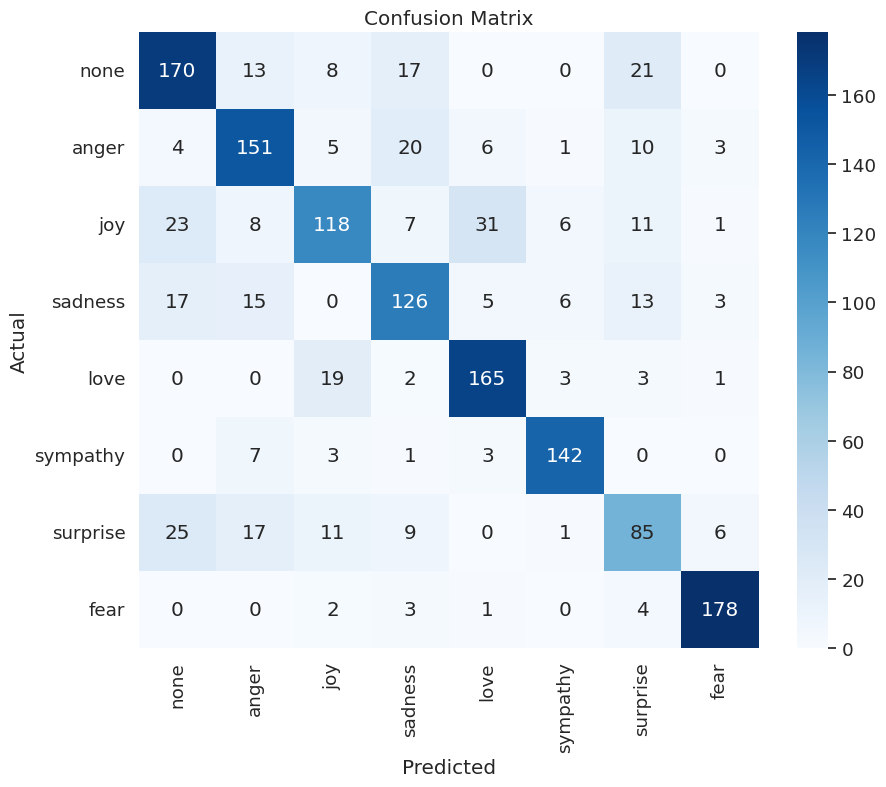

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(X_test['label'], test_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

####Train Data

In [39]:
from torch.utils.data import TensorDataset, DataLoader

input_ids = [i['input_ids'] for i in X_train]
attention_masks = [i['attention_mask'] for i in X_train]

inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
train_data = TensorDataset(inputs, masks)

train_dataloader = DataLoader(train_data, batch_size=batch_size)

In [40]:
from sklearn.metrics import classification_report

model = trainer.model
model.eval()
model.to(device)

train_pred = []
for input, masks in train_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    train_pred.extend(predictions)

print(classification_report(X_train['label'], train_pred, target_names=classes))

              precision    recall  f1-score   support

        none       0.98      0.99      0.98      1074
       anger       0.99      0.99      0.99      1019
         joy       0.98      0.98      0.98       891
     sadness       0.98      0.97      0.98       885
        love       0.98      0.99      0.98       850
    sympathy       0.99      1.00      0.99       755
    surprise       0.97      0.95      0.96       729
        fear       1.00      1.00      1.00       842

    accuracy                           0.98      7045
   macro avg       0.98      0.98      0.98      7045
weighted avg       0.98      0.98      0.98      7045



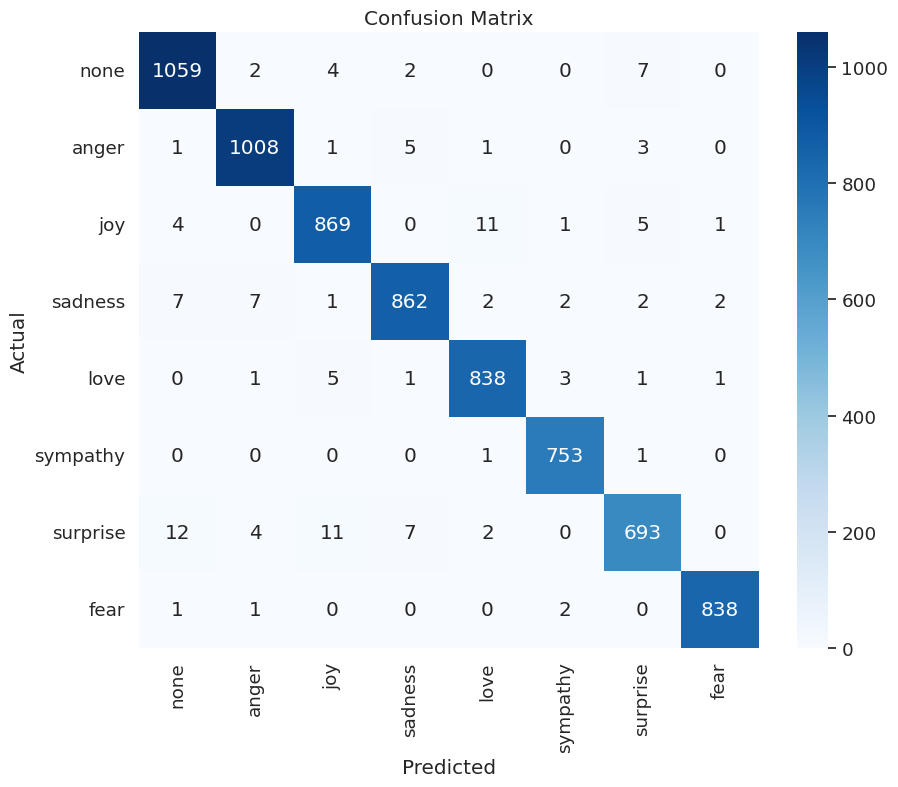

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(X_train['label'], train_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

####Dev Data

In [42]:
from torch.utils.data import TensorDataset, DataLoader

input_ids = [i['input_ids'] for i in X_dev]
attention_masks = [i['attention_mask'] for i in X_dev]

inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
dev_data = TensorDataset(inputs, masks)

dev_dataloader = DataLoader(dev_data, batch_size=batch_size)

In [43]:
from sklearn.metrics import classification_report

model = trainer.model
model.eval()
model.to(device)

dev_pred = []
for input, masks in dev_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    dev_pred.extend(predictions)

print(classification_report(X_dev['label'], dev_pred, target_names=classes))

              precision    recall  f1-score   support

        none       0.71      0.74      0.73       229
       anger       0.72      0.76      0.73       200
         joy       0.71      0.58      0.64       205
     sadness       0.68      0.68      0.68       185
        love       0.78      0.85      0.82       193
    sympathy       0.89      0.91      0.90       156
    surprise       0.58      0.55      0.56       154
        fear       0.93      0.95      0.94       188

    accuracy                           0.75      1510
   macro avg       0.75      0.75      0.75      1510
weighted avg       0.75      0.75      0.75      1510



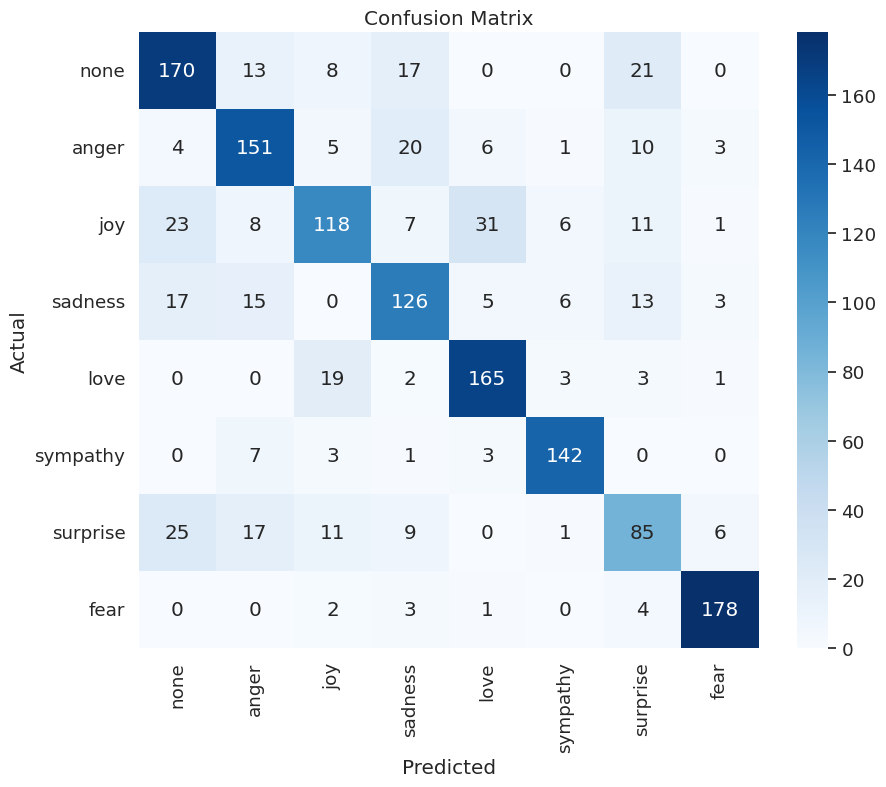

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(X_dev['label'], dev_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()